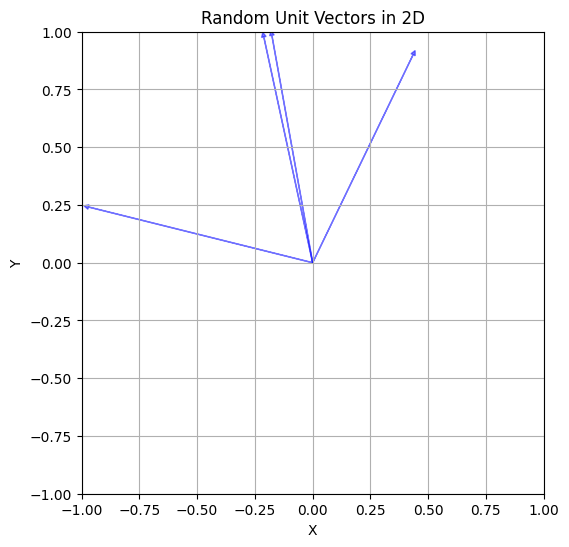

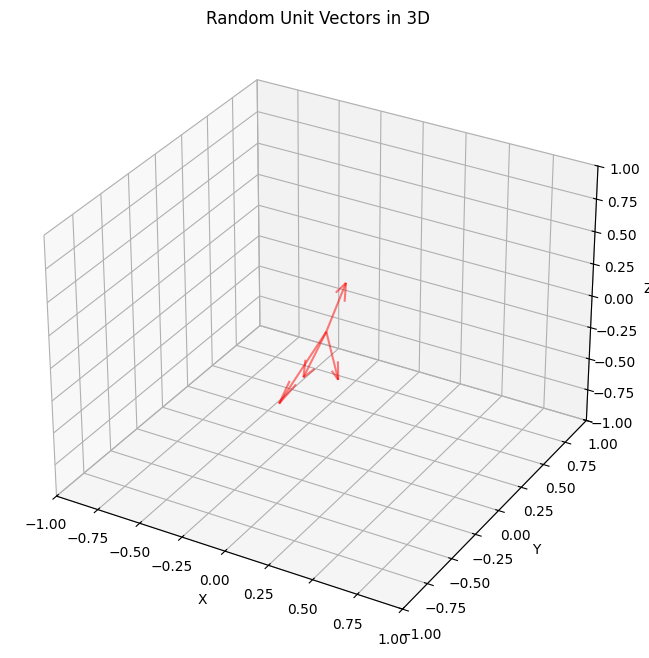

Mean angle in 2D: 89.9435 degrees
Mean angle in 3D: 89.9967 degrees
Mean angle in 4D: 90.0017 degrees
Mean angle in 5D: 90.0319 degrees
Mean angle in 10D: 90.0055 degrees
Mean angle in 50D: 90.0080 degrees


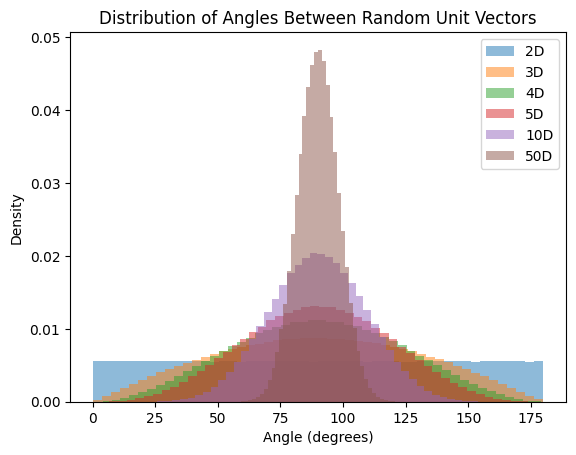

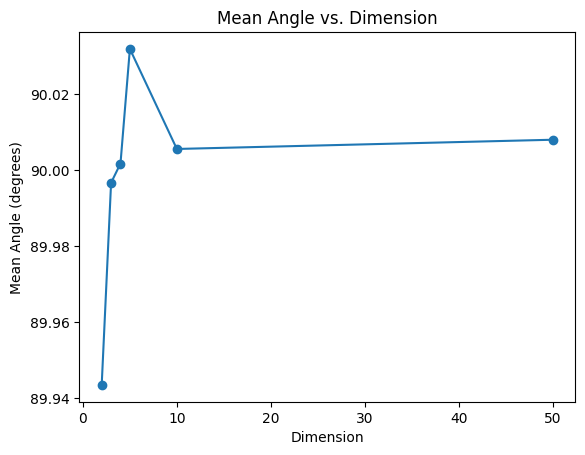

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

def generate_random_unit_vectors(n, dim=2):
    # Generate vectors with components from a standard normal distribution
    vectors = np.random.randn(n, dim)
    # Normalize each vector to have unit length
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    unit_vectors = vectors / norms
    return unit_vectors

def calculate_angles(vectors1, vectors2):
    # Compute dot products
    dot_products = np.einsum('ij,ij->i', vectors1, vectors2)
    # Clip values to avoid invalid values due to numerical errors
    dot_products = np.clip(dot_products, -1.0, 1.0)
    # Compute angles in degrees
    angles = np.degrees(np.arccos(dot_products))
    return angles

# Visualize random unit vectors in 2D
N_vis = 4  # Number of vectors to visualize
vectors_2D = generate_random_unit_vectors(N_vis, dim=2)

plt.figure(figsize=(6, 6))
for vec in vectors_2D:
    plt.arrow(0, 0, vec[0], vec[1], head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Unit Vectors in 2D')
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Visualize random unit vectors in 3D
N_vis = 4  # Number of vectors to visualize
vectors_3D = generate_random_unit_vectors(N_vis, dim=3)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for vec in vectors_3D:
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], length=0.5, normalize=True, color='red', alpha=0.5)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Random Unit Vectors in 3D')
plt.show()

# Original code for calculating and plotting angles
dimensions = [2, 3, 4, 5, 10, 50]
mean_angles = []

for dim in dimensions:
    N = 1000000  # Adjust N as needed
    vectors1 = generate_random_unit_vectors(N, dim)
    vectors2 = generate_random_unit_vectors(N, dim)

    angles = calculate_angles(vectors1, vectors2)
    mean_angle = np.mean(angles)
    mean_angles.append(mean_angle)

    # Plot histogram
    plt.hist(angles, bins=50, density=True, alpha=0.5, label=f'{dim}D')
    print(f'Mean angle in {dim}D: {mean_angle:.4f} degrees')

plt.xlabel('Angle (degrees)')
plt.ylabel('Density')
plt.title('Distribution of Angles Between Random Unit Vectors')
plt.legend()
plt.show()

# Plot mean angle versus dimension
plt.plot(dimensions, mean_angles, marker='o')
plt.xlabel('Dimension')
plt.ylabel('Mean Angle (degrees)')
plt.title('Mean Angle vs. Dimension')
plt.show()